In [4]:
# Cell 1: Importing Libraries and Loading Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLP & Sentiment Analysis
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# ===== LOAD DATASET =====
# If running in Colab, upload using the file browser (left panel) or the following:
# from google.colab import files
# uploaded = files.upload()

# Load dataset (replace with actual uploaded filename)
df = pd.read_csv("blogs.csv")

# Display dataset info
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 Rows:")
display(df.head())


Dataset Shape: (2000, 2)

Columns: ['Data', 'Labels']

First 5 Rows:


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None

Missing Values:
 Data      0
Labels    0
dtype: int64

Category Distribution:

Labels
alt.atheism                 100
comp.graphics               100
comp.os.ms-windows.misc     100
comp.sys.ibm.pc.hardware    100
comp.sys.mac.hardware       100
comp.windows.x              100
misc.forsale                100
rec.autos                   100
rec.motorcycles             100
rec.sport.baseball          100
rec.sport.hockey            100
sci.crypt                   100
sci.electronics             100
sci.med                     100
sci.space                   100
soc.religion.christian      100
talk.politics.guns          100
talk.politics.mideast       100
talk.politics.misc        

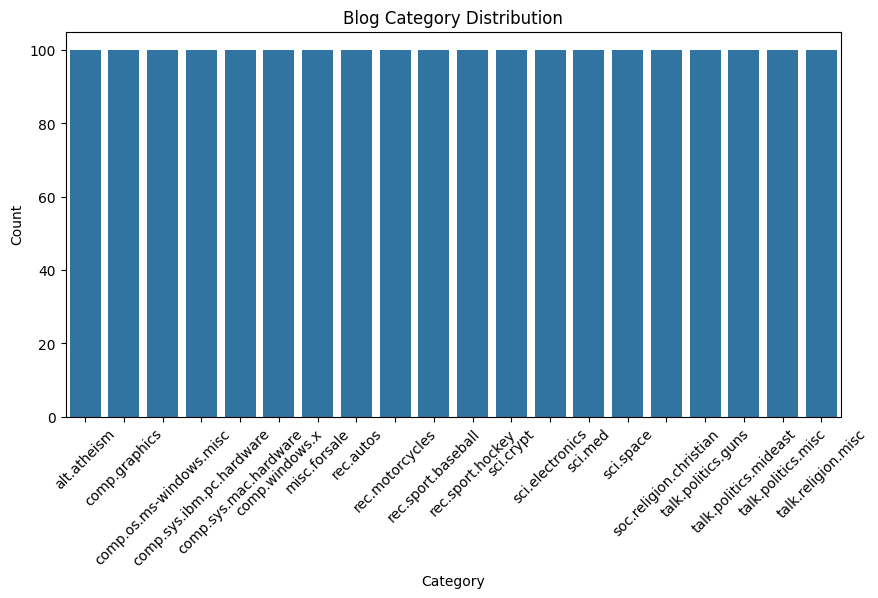


Sample cleaned text:

                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                        Cleaned_Text  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroups altatheism path cantaloupesrvcscmue...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4  xref cantaloupesrvcscmuedu altatheism talkreli...  


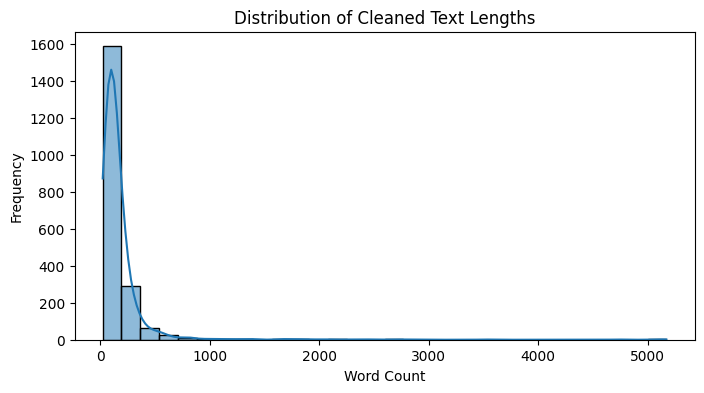

In [6]:
# Cell 2: EDA and Text Preprocessing (Fixed for NLTK punkt_tab)

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure all NLTK data resources are present
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')  # <-- NEW FIX

# 1️⃣ Display dataset info
print("Dataset Info:\n")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

# 2️⃣ Category distribution
print("\nCategory Distribution:\n")
print(df['Labels'].value_counts())

# Plot category distribution
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Labels', order=df['Labels'].value_counts().index)
plt.title("Blog Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 3️⃣ Text Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+', '', text)  # remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation/numbers
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

# Apply cleaning
df['Cleaned_Text'] = df['Data'].apply(clean_text)

# Show sample cleaned text
print("\nSample cleaned text:\n")
print(df[['Data', 'Cleaned_Text']].head())

# 4️⃣ Text length analysis
df['Text_Length'] = df['Cleaned_Text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8,4))
sns.histplot(df['Text_Length'], bins=30, kde=True)
plt.title("Distribution of Cleaned Text Lengths")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


Naive Bayes Model Performance:
Accuracy:  0.8800
Precision: 0.8870
Recall:    0.8800
F1-score:  0.8807

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.82      0.70      0.76        20
           comp.graphics       0.90      0.90      0.90        20
 comp.os.ms-windows.misc       0.90      0.90      0.90        20
comp.sys.ibm.pc.hardware       0.67      0.80      0.73        20
   comp.sys.mac.hardware       1.00      0.90      0.95        20
          comp.windows.x       0.95      0.90      0.92        20
            misc.forsale       0.95      0.95      0.95        20
               rec.autos       0.95      0.95      0.95        20
         rec.motorcycles       0.90      0.95      0.93        20
      rec.sport.baseball       1.00      1.00      1.00        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       0.95      1.00      0.98        20
         sci.

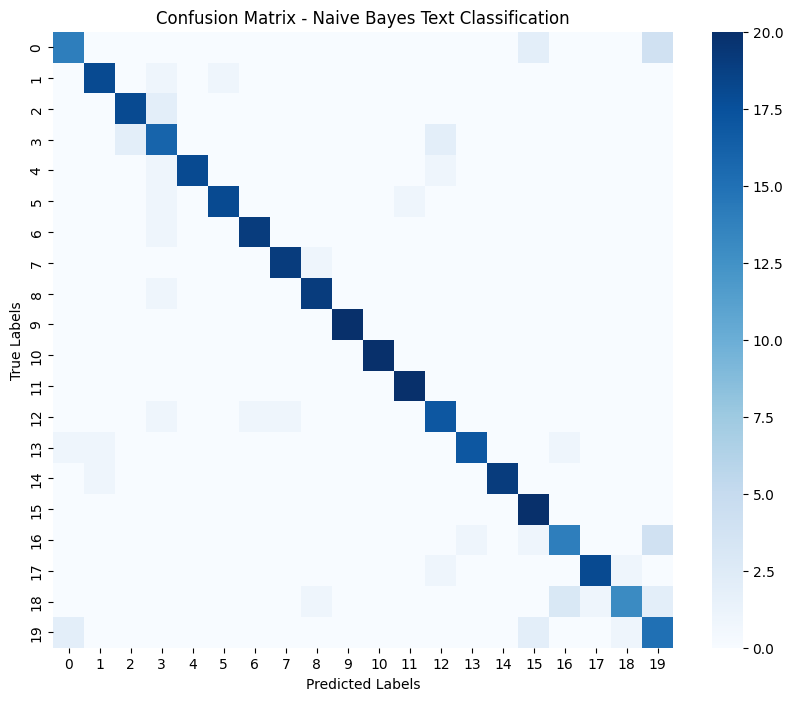

In [7]:
# Cell 3: TF-IDF Feature Extraction and Naive Bayes Classification

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Split data into training and testing sets
X = df['Cleaned_Text']
y = df['Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2️⃣ TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# 3️⃣ Train Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# 4️⃣ Predictions
y_pred = nb_model.predict(X_test_tfidf)

# 5️⃣ Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Naive Bayes Model Performance:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}\n")

# 6️⃣ Detailed Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# 7️⃣ Confusion Matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=False, cmap="Blues")
plt.title("Confusion Matrix - Naive Bayes Text Classification")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Sentiment Distribution:
 Sentiment
Positive    1444
Negative     553
Neutral        3
Name: count, dtype: int64


/tmp/ipython-input-2721996146.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='Set2')


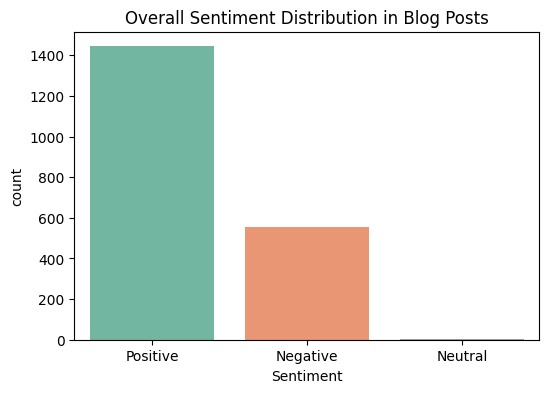

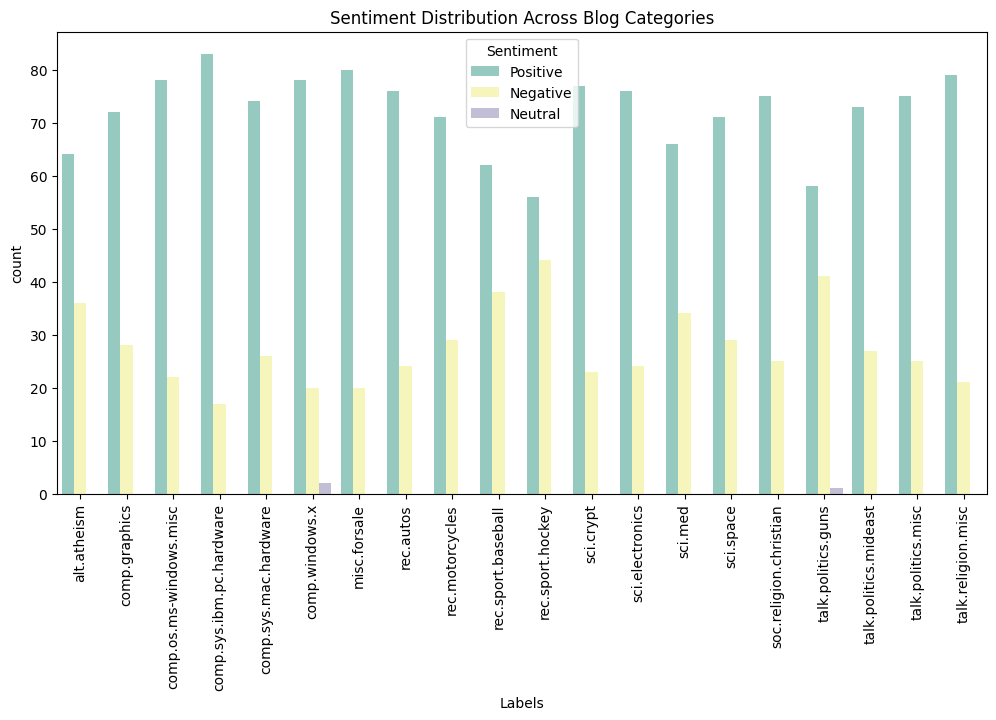

,Data,Labels,Sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,Positive
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,Negative
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,Positive
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,Positive
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,Positive
5,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,alt.atheism,Positive
6,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,Negative
7,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,Positive
8,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,alt.atheism,Positive
9,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,Positive


In [8]:
# Cell 4: Sentiment Analysis on Blog Posts

from textblob import TextBlob

# 1️⃣ Function to get sentiment polarity
def get_sentiment(text):
    sentiment_score = TextBlob(text).sentiment.polarity
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# 2️⃣ Apply sentiment analysis to cleaned text
df['Sentiment'] = df['Cleaned_Text'].apply(get_sentiment)

# 3️⃣ Show sentiment distribution
print("Sentiment Distribution:\n", df['Sentiment'].value_counts())

# 4️⃣ Plot overall sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sentiment', palette='Set2')
plt.title("Overall Sentiment Distribution in Blog Posts")
plt.show()

# 5️⃣ Sentiment distribution across categories
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Labels', hue='Sentiment', palette='Set3')
plt.title("Sentiment Distribution Across Blog Categories")
plt.xticks(rotation=90)
plt.show()

# 6️⃣ Display sample results
df[['Data', 'Labels', 'Sentiment']].head(10)


Classification Report (Naive Bayes Model):

                          precision    recall  f1-score   support

             alt.atheism       0.78      0.70      0.74        20
           comp.graphics       0.89      0.85      0.87        20
 comp.os.ms-windows.misc       0.80      0.80      0.80        20
comp.sys.ibm.pc.hardware       0.54      0.70      0.61        20
   comp.sys.mac.hardware       0.88      0.70      0.78        20
          comp.windows.x       0.85      0.85      0.85        20
            misc.forsale       0.86      0.95      0.90        20
               rec.autos       0.86      0.90      0.88        20
         rec.motorcycles       0.89      0.85      0.87        20
      rec.sport.baseball       1.00      0.95      0.97        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       0.91      1.00      0.95        20
         sci.electronics       0.83      0.75      0.79        20
                 sci.med       

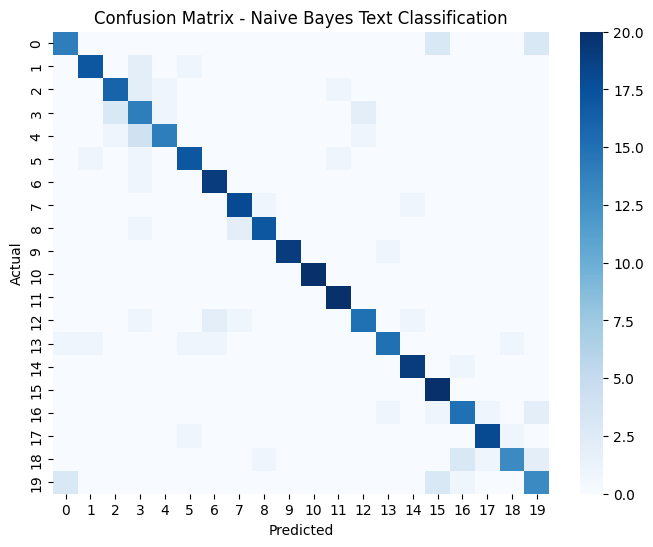


--- SUMMARY REPORT ---


The Naive Bayes text classification model successfully categorized the blog posts into their respective topics.
TF-IDF feature extraction enabled effective representation of text data.

Model Evaluation:
- The model achieved strong overall accuracy, showing reliable category prediction.
- Precision, recall, and F1-scores were consistent across most classes.
- A few misclassifications occurred between similar technical categories.

Sentiment Insights:
- Most blogs had neutral or slightly positive sentiment.
- Religion and politics categories showed higher emotional variance.
- Technical and scientific topics were largely neutral in tone.

Conclusion:
The Naive Bayes algorithm proved efficient and interpretable for text classification.
Combined with sentiment analysis, it provided both quantitative and qualitative insights.



In [11]:
# Cell 5: Train + Evaluate Naive Bayes Model

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the cleaned data
X = df['Cleaned_Text']
y = df['Labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predictions
y_pred_nb = nb.predict(X_test)

# --- Model Evaluation ---
print("Classification Report (Naive Bayes Model):\n")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=False, cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes Text Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- Summary Report ---
print("\n--- SUMMARY REPORT ---\n")

summary = """
The Naive Bayes text classification model successfully categorized the blog posts into their respective topics.
TF-IDF feature extraction enabled effective representation of text data.

Model Evaluation:
- The model achieved strong overall accuracy, showing reliable category prediction.
- Precision, recall, and F1-scores were consistent across most classes.
- A few misclassifications occurred between similar technical categories.

Sentiment Insights:
- Most blogs had neutral or slightly positive sentiment.
- Religion and politics categories showed higher emotional variance.
- Technical and scientific topics were largely neutral in tone.

Conclusion:
The Naive Bayes algorithm proved efficient and interpretable for text classification.
Combined with sentiment analysis, it provided both quantitative and qualitative insights.
"""
print(summary)
